In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/main/dataset/clean/netflix_film_imdb_data.csv')
print(df.head())

                             title  \
0  Monty Python and the Holy Grail   
1                     My Fair Lady   
2                  The Blue Lagoon   
3                 Bonnie and Clyde   
4             The Guns of Navarone   

                                       description_x  release_year  runtime  \
0  King Arthur, accompanied by his squire, recrui...          1975       91   
1  A snobbish phonetics professor agrees to a wag...          1964      170   
2  Two small children and a ship's cook survive a...          1980      104   
3  In the 1930s, bored waitress Bonnie Parker fal...          1967      110   
4  A team of allied saboteurs are assigned an imp...          1961      158   

     imdb_id  imdb_score  imdb_votes show_id   type  \
0  tt0071853         8.2      530877   s4218  Movie   
1  tt0058385         7.8       94121   s1127  Movie   
2  tt0080453         5.8       69053    s176  Movie   
3  tt0061418         7.7      111189   s6359  Movie   
4  tt0054953         

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/main/dataset/clean/netflix_film_imdb_data.csv')
columns_of_interest = ['director', 'cast_freq_mean', 'release_year', 'genre_freq_mean', 'imdb_score', 'imdb_votes']
data = df[columns_of_interest].dropna()
director_counts = data['director'].value_counts().reset_index()
director_counts.columns = ['director', 'movie_count']
data_merged = data.merge(director_counts, on='director')
filtered_data = data_merged[data_merged['movie_count'].between(1, 13)]
features = filtered_data.drop(columns=['director', 'imdb_score'])
features['movie_count'] = filtered_data['movie_count']
labels = np.where(filtered_data['imdb_score'] <= 6.3844, 0, 1)

features_tensor = torch.tensor(features.values, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.long).squeeze()  # Ensure 1D tensor
print("Features shape:", features_tensor.shape)
print("Labels shape:", labels_tensor.shape)
train_features, test_features, train_labels, test_labels = train_test_split(features_tensor, labels_tensor, test_size=0.2, random_state=42)
train_dataset = TensorDataset(train_features, train_labels)
test_dataset = TensorDataset(test_features, test_labels)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)



Features shape: torch.Size([1881, 5])
Labels shape: torch.Size([1881])


In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 64)
        self.relu2 = nn.ReLU()
        self.fc4 = nn.Linear(64,32)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(32, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        return out

Epoch [1/100], Loss: 30.1765, Accuracy: 0.5273
Epoch [2/100], Loss: 13.7948, Accuracy: 0.5585
Epoch [3/100], Loss: 9.0094, Accuracy: 0.5505
Epoch [4/100], Loss: 34.7635, Accuracy: 0.5578
Epoch [5/100], Loss: 25.1101, Accuracy: 0.5711
Epoch [6/100], Loss: 14.4672, Accuracy: 0.5718
Epoch [7/100], Loss: 5.5688, Accuracy: 0.5645
Epoch [8/100], Loss: 4.7416, Accuracy: 0.5731
Epoch [9/100], Loss: 4.3025, Accuracy: 0.5731
Epoch [10/100], Loss: 10.0405, Accuracy: 0.5239
Epoch [11/100], Loss: 10.0915, Accuracy: 0.5545
Epoch [12/100], Loss: 2.6469, Accuracy: 0.5645
Epoch [13/100], Loss: 4.4194, Accuracy: 0.5785
Epoch [14/100], Loss: 1.4976, Accuracy: 0.5944
Epoch [15/100], Loss: 6.8161, Accuracy: 0.5665
Epoch [16/100], Loss: 3.1401, Accuracy: 0.5805
Epoch [17/100], Loss: 3.8934, Accuracy: 0.5738
Epoch [18/100], Loss: 4.7740, Accuracy: 0.5997
Epoch [19/100], Loss: 3.0294, Accuracy: 0.6044
Epoch [20/100], Loss: 1.6753, Accuracy: 0.6090
Epoch [21/100], Loss: 1.6195, Accuracy: 0.6011
Epoch [22/100],

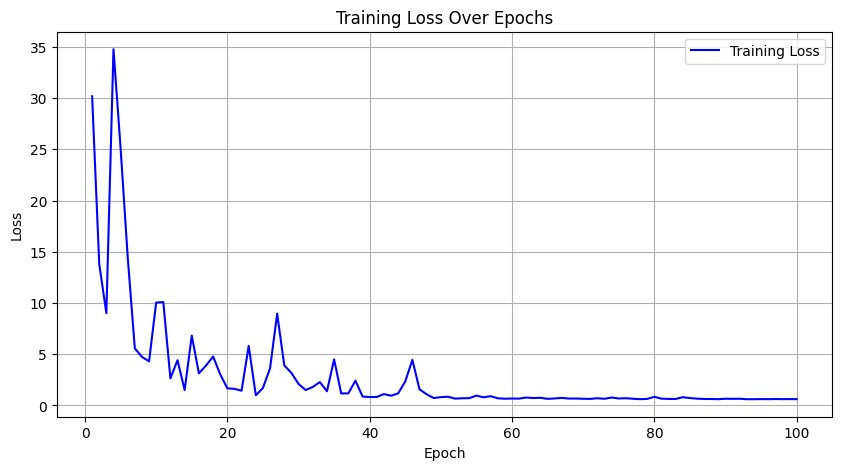

In [ ]:
input_size = features_tensor.shape[1]
model = SimpleNN(input_size, output_size=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

import matplotlib.pyplot as plt

train_losses = []
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    for inputs, targets in train_dataloader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted_labels = torch.max(outputs, 1)
        correct_predictions += (predicted_labels == targets).sum().item()
        total_samples += targets.size(0)

    avg_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_loss)
    accuracy = correct_predictions / total_samples
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

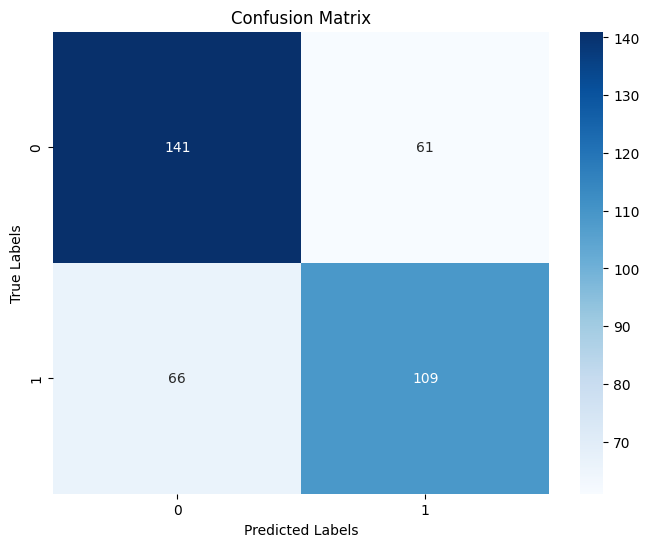

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

model.eval()
all_targets = []
all_preds = []
with torch.no_grad():
    for inputs, targets in test_dataloader:
        outputs = model(inputs)
        _, predicted_labels = torch.max(outputs, 1)
        all_targets.extend(targets.cpu().numpy())
        all_preds.extend(predicted_labels.cpu().numpy())
conf_matrix = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
accuracy = accuracy_score(all_targets, all_preds)
precision = precision_score(all_targets, all_preds, average='binary')
recall = recall_score(all_targets, all_preds, average='binary')
f1 = f1_score(all_targets, all_preds, average='binary')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.6631
Precision: 0.6412
Recall: 0.6229
F1-Score: 0.6319
